In [1]:
import numpy as np
from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import math 
style.use('ggplot')

In [2]:
def hypothesis(x,w,j):
    h = w[0]
    X=np.ones((len(w), len(x)))
    for i in np.arange(1, len(w)):                
        X[i] = x ** (i)
    X=np.transpose(X)
    h= X@w
    return h

In [3]:
#errors
def error(X, y, w, i, j):
    if(i==0): #mean_square_error
        y1 = hypothesis(X,w,j)
        return sum((y1-y)**2)/(y.size)
    elif i==1: #mean_absolute_error
        y1 = hypothesis(X,w,j)
        return sum(abs(y1-y))/(y.size)
    elif i==2: #log_cosh_loss
        y1 = hypothesis(X,w,j)
        return np.sum(np.log(np.cosh(y1-y)))/(y.size)
    elif i==3: #root_mean_square_error
        y1 = hypothesis(X,w,j)
        return np.sqrt(sum((y1-y)**2)/(y.size))
    elif i==4: #log loss
        y1 = hypothesis(X,w,j)
        return sum(np.log(1/np.abs(y1-y))/(y.size))
    elif i==5: #KLDivergence
        y1 = hypothesis(X,w,j)
        return np.sum(y1 *( np.log(abs(y1))-np.log(abs(y))))/y.size

In [4]:
#gradient functions
def grad(X, y, h, err):
    n=y.size
    if err==0:
        return (2/n)*np.dot(np.transpose(X), h-y)
    elif err==1:
        return (1/n)*np.dot(np.transpose(X),np.sign(h-y))    
    elif err==2:
        return (1/n)*np.dot(np.transpose(X), np.tanh(h-y))
    elif err==3:
        return np.dot(np.transpose(X), h-y)/(np.sqrt(sum((h-y)**2))*n)
    elif err==4:
        return (-1/n)*np.dot((np.transpose(X),np.transpose(np.linalg.pinv(h-y))))
    elif err==5:
        return np.add(np.dot(np.transpose(X),np.log(np.abs(h/y))) , np.dot(np.transpose(X),y))

In [5]:
#basis functions
def basis(x,i):
    if(i==0):
        return x
    elif(i==1):
        #gaussian
        return np.exp(-(x**2)/2)
    elif(i==2):
        #sigmoid
        return 1/(1+np.exp(-x))
    elif(i==3):
        #tanh
        return (1-np.exp(-x))/(1+np.exp(-x))

In [6]:
#noise variance
def noise(x,w,y):
    return error(x, y, w, 0, 0)

In [7]:
def grd_des(x, y, order=1, err=0, basis=0, tol = 10**-5, numIters = 1000, learningRate = 10**-8):
    n = len(x)
    w = np.random.normal(0,0.1,(order + 1))          
    X=np.ones((order+1, len(x)))
    for i in np.arange(1, order+1):                
        X[i] = x ** (i)
    X=np.transpose(X)
    Cost = []
    for i in range(numIters):
            h = hypothesis(x, w, 0)
            w += -learningRate * grad(X, y, h, err)
            cost = error(x, y, w, err , 0)
            Cost.append(cost)         
        
    
    plt.figure(1)
    plt.scatter(x,y,c='b')
    func = w[0]
    labelr= []
    labelr.append('%.*f' % (2, w[0]))
    for i in np.arange(1, len(w)):            
        labelr.append(' + ' +'%.*f' % (2, w[i]) + 'x^' + str(i) ) 
    label = ''.join(labelr)
    print(label)
    print('Using gradient descent')
    func= hypothesis(x,w,0)
    plt.plot(x, func)        
    plt.title('Polynomial Fit: Order ' + str(len(w)-1))
    plt.xlabel('x')
    plt.ylabel('y') 
    
    plt.figure(2)
    plt.plot(Cost)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost vs Iterations of Gradient Descent')
    
    plt.show()
    return w

In [8]:
def main_f(order,what,size, batch_size=5, numIters = 1000,tol = 10**-5, learningRate = 0.001, err = 0):
    if(err==0):
        print('mean_square_error')
    elif err==1:
        print('mean_absolute_error')
    elif err==2: 
        print('log_cosh_loss')
    elif err==3: 
        print('root_mean_square_error')
    elif err==4: 
        print('log loss')
    elif err==5: 
        print('KLDivergence')
        
    if(what==0):
        print('Calculating w by psuedo_inverse')
    elif what==1:
        print('Calculating w by gradient descent')
        
    print('Polynomial Order:' + str(order))
    
    data_set= pd.read_csv("https://web.iitd.ac.in/~seshan/a1/group09.txt", sep="\s+")
    global X
    global Y
    X = data_set.iloc[:size,0].values
    Y = data_set.iloc[:size,1].values
    X_train = []
    X_test = []
    Y_train = []
    Y_test = []
    for i in range(0,20):
        if i%5 == 0:
            X_test.append(data_set.iloc[i,0])
            Y_test.append(data_set.iloc[i,1])
        else:
            X_train.append(data_set.iloc[i,0])
            Y_train.append(data_set.iloc[i,1])  
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
    
    if what == 0:
        return perf_on_test(X_train, Y_train, X_test, Y_test,order)     
    else:
        w = grd_des(X_train, Y_train, order, err, 0, tol, numIters, learningRate)
        cost_train= error(X_train, Y_train, w,err,0)
        print('Training Cost: ' + str(cost_train))
        cost_test= error(X_test, Y_test, w, err,0)
        print('Testing Cost: ' + str(cost_test))
        noisee = noise(X,w,Y)
        print('Noise: ' + str(noisee))

root_mean_square_error
Calculating w by gradient descent
Polynomial Order:3
123.39 + -335.54x^1 + 667.78x^2 + 301.86x^3
Using gradient descent


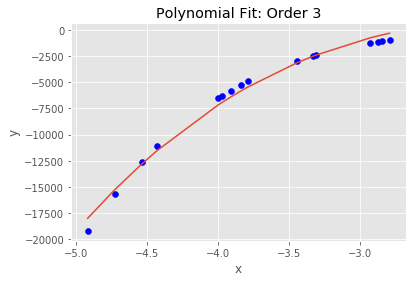

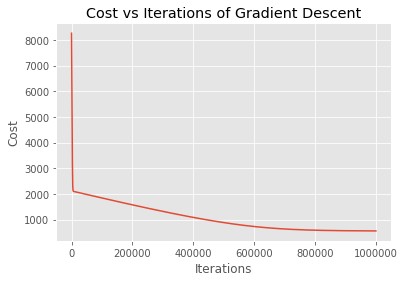

Training Cost: 558.5286441078493
Testing Cost: 915.7922840692347
Noise: 417298.4985433114
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:4
-61.97 + 101.49x^1 + -76.07x^2 + -193.08x^3 + -67.59x^4
Using gradient descent


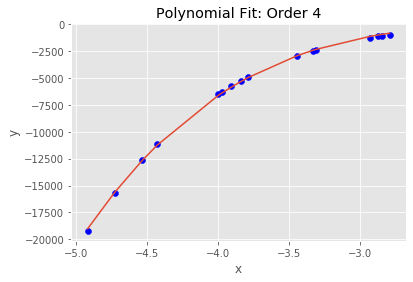

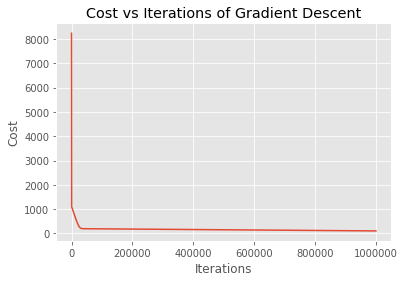

Training Cost: 102.00256266075135
Testing Cost: 176.01548424108472
Noise: 14519.908370013112
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:5
-0.46 + 0.54x^1 + -0.71x^2 + -0.95x^3 + 6.08x^4 + 7.60x^5
Using gradient descent


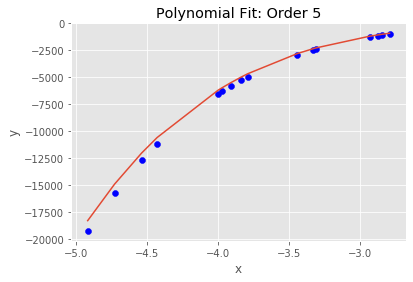

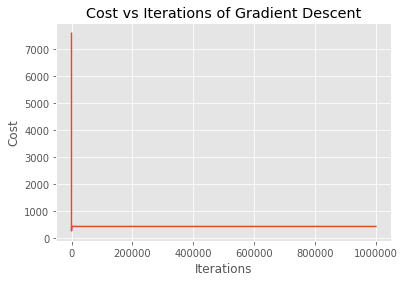

Training Cost: 417.6830414066313
Testing Cost: 575.4177886905001
Noise: 205788.42477124787
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:6
0.51 + -0.67x^1 + 1.41x^2 + -2.64x^3 + 1.79x^4 + 6.00x^5 + 1.27x^6
Using gradient descent


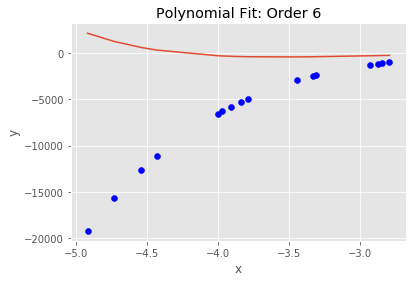

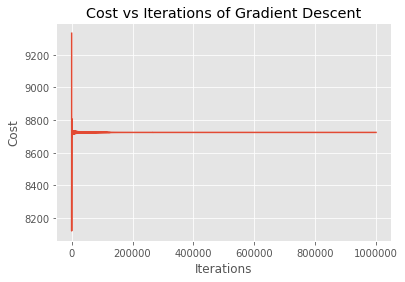

Training Cost: 8724.666646188522
Testing Cost: 12641.984445285445
Noise: 92859800.6126594
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:7


KeyboardInterrupt: 

In [9]:
for i in range(3,10):
    main_f(i,1,20, 5, 1000000,10**-5, 0.002,3)

root_mean_square_error
Calculating w by gradient descent
Polynomial Order:3
48.44 + -121.29x^1 + 216.53x^2 + 182.74x^3
Using gradient descent


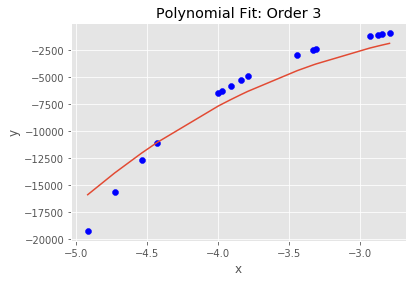

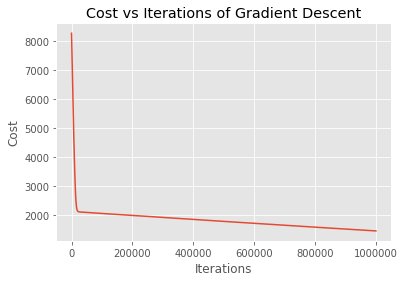

Training Cost: 1444.4103333378864
Testing Cost: 2239.622421967674
Noise: 2672238.6874386813
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:4
-9.18 + 8.24x^1 + 22.59x^2 + -121.17x^3 + -57.73x^4
Using gradient descent


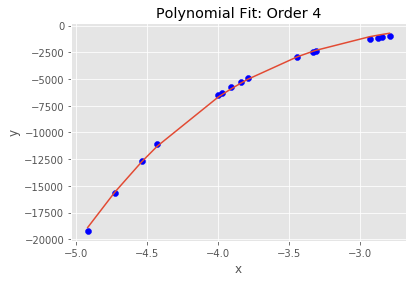

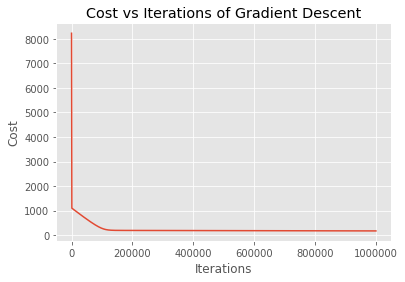

Training Cost: 172.61482275825122
Testing Cost: 270.97913289559074
Noise: 38522.63972165924
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:5
-0.29 + 0.74x^1 + -0.57x^2 + -0.88x^3 + 6.00x^4 + 8.00x^5
Using gradient descent


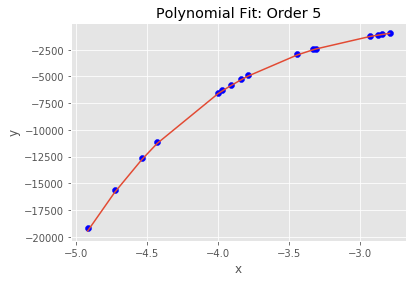

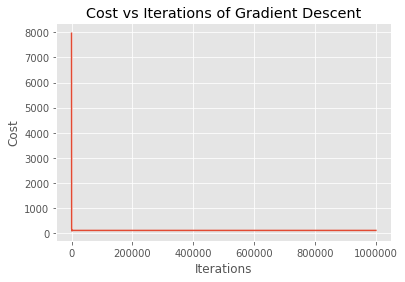

Training Cost: 104.42076035064404
Testing Cost: 143.66785618552566
Noise: 12851.046733954285
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:6
0.29 + -0.83x^1 + 1.64x^2 + -2.61x^3 + 1.64x^4 + 6.19x^5 + 0.19x^6
Using gradient descent


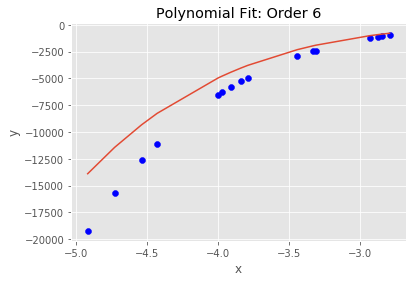

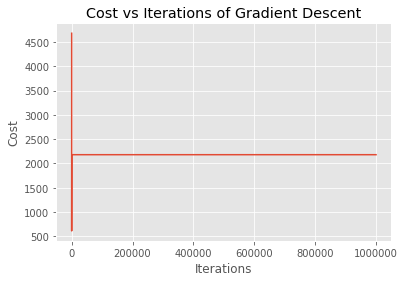

Training Cost: 2181.1666986717523
Testing Cost: 3153.975059949424
Noise: 5795502.269672299
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:7
-0.07 + -0.29x^1 + -0.08x^2 + 0.19x^3 + -0.94x^4 + 1.44x^5 + -1.49x^6 + -1.60x^7
Using gradient descent


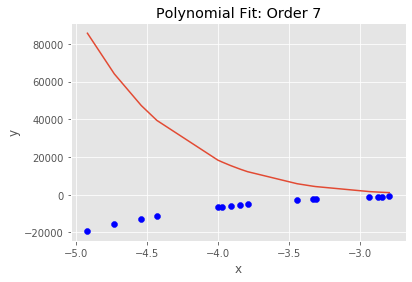

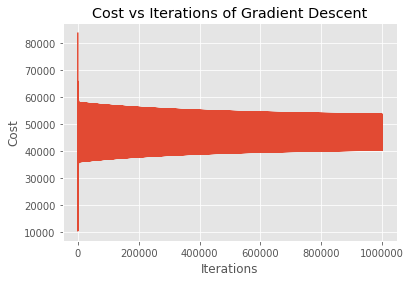

Training Cost: 40266.72032858019
Testing Cost: 61306.29604913884
Noise: 2048819399.8690057
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:8
0.01 + 0.13x^1 + -0.19x^2 + 0.04x^3 + -0.63x^4 + 1.30x^5 + -1.51x^6 + -0.40x^7 + 1.80x^8
Using gradient descent


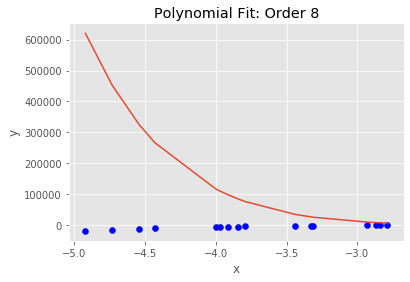

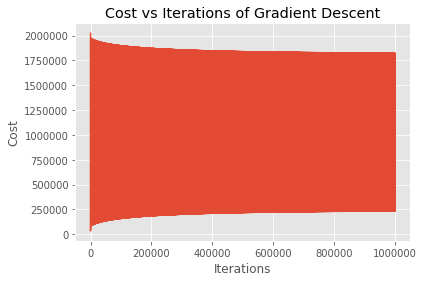

Training Cost: 234076.60504712578
Testing Cost: 372968.10128886224
Noise: 71654526540.11427
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:9
0.01 + -0.04x^1 + -0.14x^2 + 0.13x^3 + -0.24x^4 + 0.42x^5 + -0.82x^6 + 1.06x^7 + 0.58x^8 + -1.02x^9
Using gradient descent


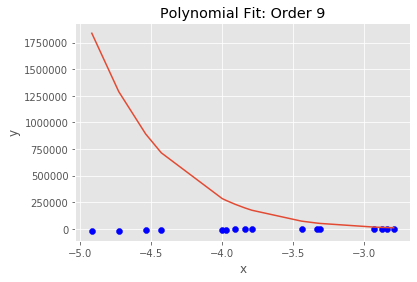

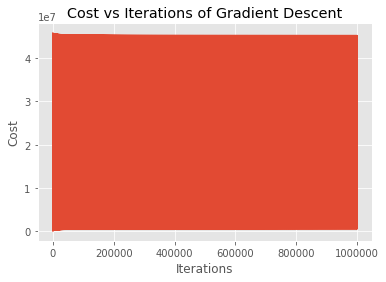

Training Cost: 651765.0411345077
Testing Cost: 1084111.9589489864
Noise: 574897882983.2952


In [10]:
for i in range(3,10):
    main_f(i,1,20, 5, 1000000,10**-5, 0.0005,3)

root_mean_square_error
Calculating w by gradient descent
Polynomial Order:6
0.25 + -0.82x^1 + 1.36x^2 + -2.36x^3 + 1.52x^4 + 6.16x^5 + -0.19x^6
Using gradient descent


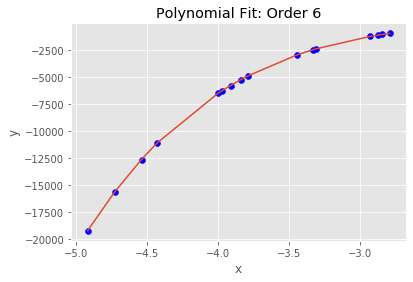

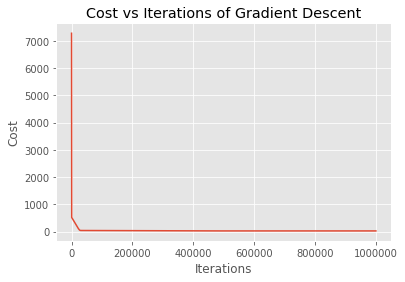

Training Cost: 21.81166300636984
Testing Cost: 21.585032593755333
Noise: 473.78164089745013
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:7
-0.12 + 0.10x^1 + -0.24x^2 + 0.33x^3 + -0.76x^4 + 1.56x^5 + -1.79x^6 + -0.18x^7
Using gradient descent


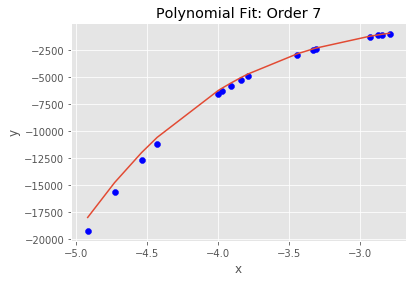

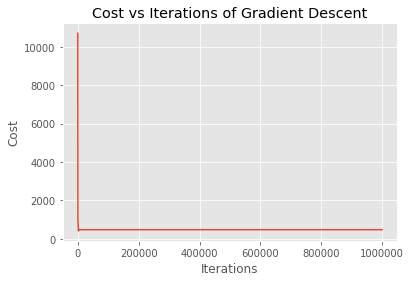

Training Cost: 468.6337770476871
Testing Cost: 735.3017003742358
Noise: 283827.81170663366
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:8
-0.06 + 0.00x^1 + -0.04x^2 + 0.15x^3 + -0.57x^4 + 0.44x^5 + -1.09x^6 + 0.38x^7 + -0.01x^8
Using gradient descent


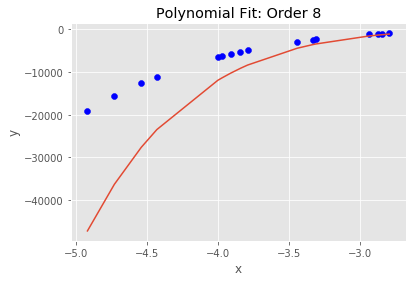

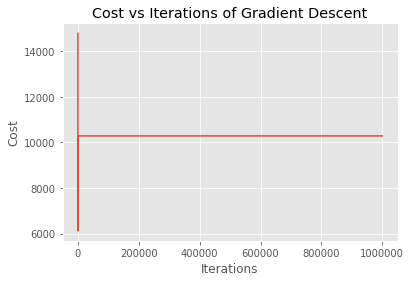

Training Cost: 10281.61017547158
Testing Cost: 16248.366954690922
Noise: 137371091.97914702
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:9
-0.12 + 0.11x^1 + -0.17x^2 + -0.10x^3 + -0.03x^4 + 0.08x^5 + -0.15x^6 + 0.45x^7 + -0.15x^8 + 0.34x^9
Using gradient descent


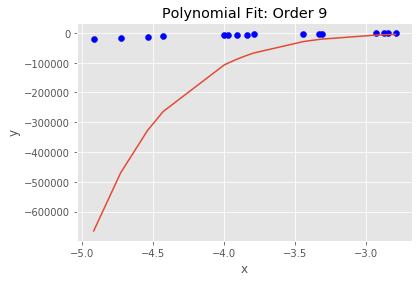

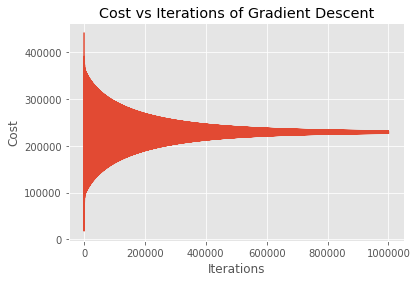

Training Cost: 226880.41838193414
Testing Cost: 377055.5365866198
Noise: 69613954930.25394


In [11]:
for i in range(6,10):
    main_f(i,1,20, 5, 1000000,10**-5, 0.000005,3)

root_mean_square_error
Calculating w by gradient descent
Polynomial Order:8
0.04 + 0.16x^1 + -0.21x^2 + 0.42x^3 + -0.84x^4 + 1.46x^5 + -2.05x^6 + -0.27x^7 + -0.01x^8
Using gradient descent


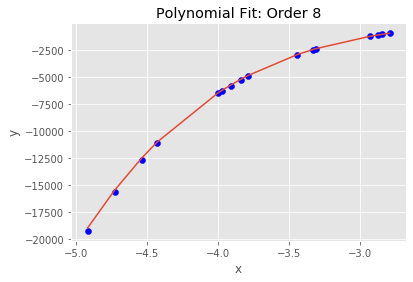

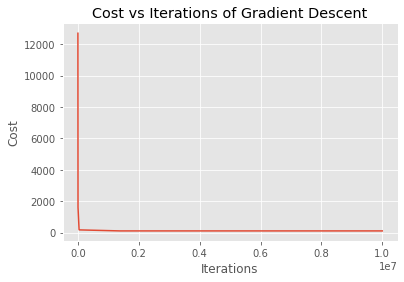

Training Cost: 102.8161017533737
Testing Cost: 168.73044684238505
Noise: 14150.913362134266
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:9
-0.12 + -0.09x^1 + -0.04x^2 + 0.04x^3 + -0.09x^4 + 0.57x^5 + -0.85x^6 + 0.99x^7 + 0.32x^8 + 0.02x^9
Using gradient descent


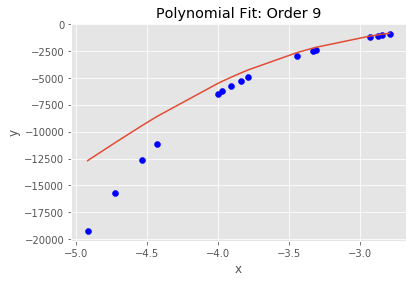

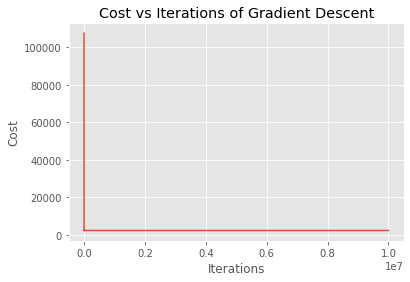

Training Cost: 2291.701182841611
Testing Cost: 3799.6671411201814
Noise: 7089009.525811794


In [12]:
for i in range(8,10):
    main_f(i,1,20, 5, 10000000,10**-5, 0.00000005,3)